# Jupyter Notebook
### Teče kot strežnik na lokalnem računalniku.  Do njega se dostopa preko spletnega brskalnika. Omogoča interaktivno programiranje v pythonu, izpis rezultatov, shranjevanje v html itn.
### Koda se zapiše v celice in se požene z "run cell" ali z CTRL+ENTER 

In [1]:
print ("Hello world")

Hello world


# Inicializacija in uvoz knjižnic
### Pandas (uvožen kot pd) je odprtokodna knjižnica, ki zagotavlja visoko zmogljive in enostavne podatkovne strukture (tabele, "Data Frame") in orodja za analizo podatkov za programski jezik Python. Ko je Pandas podatkovna struktura inicializirana znotraj Jupyter Notebooka se izpiše kot (html) tabela.


### Sqlalchemy omogoča povezavo s podatkovno bazo, pošiljanje SQL ukazov in sprejem rezultatov. V povezavi s Pandas.read_sql funkcijo omogoča shranjevanje ter obdelavo podatkov.

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
import sqlalchemy as sa
from sqlalchemy import create_engine

##manjka password/engine da ne bo javno
# Set to database IP. This must be reachable from the machine where this script is ran. 
DB_IP='194.249.4.173'
# Set the database username and password
DB_USER= ""
DB_PASS= ""

engine = create_engine('postgresql://'+DB_USER+':'+DB_PASS+'@'+DB_IP+'/rmbt')

def query( what, params=None ):
    return pd.read_sql(sa.text(what), engine, params=params)


### Primer ustvarjanja PandasDF

In [3]:
df = pd.DataFrame(np.random.randn(6,4),  columns=list('ABCD'))

In [4]:
df

,A,B,C,D
0,-0.907556,1.365414,1.331005,-1.132102
1,-1.269899,-1.474288,1.835937,-1.745083
2,0.661196,0.426885,0.393385,-0.119629
3,-0.363373,-0.651084,1.021546,1.337187
4,0.258034,0.233685,-0.147731,-0.221677
5,0.771520,-1.740548,-0.231136,-0.103429


### Statistične vrednosti

In [5]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.141680,-0.306656,0.700501,-0.330789
std,0.842248,1.196989,0.833257,1.051918
min,-1.269899,-1.740548,-0.231136,-1.745083
25%,-0.771511,-1.268487,-0.012452,-0.904496
50%,-0.052670,-0.208700,0.707466,-0.170653
75%,0.560405,0.378585,1.253640,-0.107479
max,0.771520,1.365414,1.835937,1.337187


### Prikaz stolpca A, morajo biti dvojni oklepaji, drugače vrača Pandas.Series

In [6]:
df[['A']]

,A
0,-0.907556
1,-1.269899
2,0.661196
3,-0.363373
4,0.258034
5,0.771520


### Izpis vseh vrstic, kjer je A>0

In [7]:
df[df.A>0]
# df.query('A > 0')

,A,B,C,D
2,0.661196,0.426885,0.393385,-0.119629
4,0.258034,0.233685,-0.147731,-0.221677
5,0.771520,-1.740548,-0.231136,-0.103429


### Sortiranje po stolpcu

In [66]:
df.sort_values(by=['B'])

,A,B,C,D
1,-1.962596,-1.201523,1.379600,-0.627668
4,-0.164479,-1.166691,0.510749,-1.068269
0,1.221744,0.179132,-0.055878,-0.432656
3,1.215463,1.012331,1.093137,-1.102759
2,-0.212971,1.217412,0.506806,0.586608
5,0.985148,1.449932,1.108589,0.839705


### Izpis vseh vrstic, kjer je A>0 in B>0

In [8]:
df[(df.A > 0 ) & (df.B > 0)]

,A,B,C,D
2,0.661196,0.426885,0.393385,-0.119629
4,0.258034,0.233685,-0.147731,-0.221677


### Izpis vseh vrstic kjer je index>3

In [32]:
df[df.index>3]

,A,B,C,D
4,-0.164479,-1.166691,0.510749,-1.068269
5,0.985148,1.449932,1.108589,0.839705


### Index od 0 do 3 

In [41]:
df[0:3]

,A,B,C,D
0,1.221744,0.179132,-0.055878,-0.432656
1,-1.962596,-1.201523,1.379600,-0.627668
2,-0.212971,1.217412,0.506806,0.586608


### Računanje povprečja stolpcev

In [53]:
df.mean() #min, max

A    0.180385
B    0.248432
C    0.757167
D   -0.300840
dtype: float64

### Računanje povprečja vrstic

In [57]:
df.mean(axis=1)

0    0.228085
1   -0.603047
2    0.524464
3    0.554543
4   -0.472172
5    1.095844
dtype: float64

In [68]:
pd.DataFrame(df.mean(axis=1), columns=['Povprečje vrstic']) ##Damo v DataFrame

,Povprečje vrstic
0,0.228085
1,-0.603047
2,0.524464
3,0.554543
4,-0.472172
5,1.095844


In [69]:
pd.DataFrame(df.mean(axis=0), columns=['Povprečje stolpcev']) ##Damo v DataFrame

,Povprečje stolpcev
A,0.180385
B,0.248432
C,0.757167
D,-0.300840


### Dodajanje novega stolpca, ki je seštevek stolpcev B in C

In [74]:
df['B+C'] = df.B + df.C
df

,A,B,C,D,B+C
0,1.221744,0.179132,-0.055878,-0.432656,0.123254
1,-1.962596,-1.201523,1.379600,-0.627668,0.178077
2,-0.212971,1.217412,0.506806,0.586608,1.724218
3,1.215463,1.012331,1.093137,-1.102759,2.105468
4,-0.164479,-1.166691,0.510749,-1.068269,-0.655942
5,0.985148,1.449932,1.108589,0.839705,2.558521


### Dodajanje novega stolpca, ki je odvisen od vrednosti drugih stolpcev

In [75]:
df['A>0'] = df.apply(lambda vrstica: 'vecje' if vrstica['A']>0 else 'manjse', axis=1)

In [76]:
df

,A,B,C,D,B+C,A>0
0,1.221744,0.179132,-0.055878,-0.432656,0.123254,vecje
1,-1.962596,-1.201523,1.379600,-0.627668,0.178077,manjse
2,-0.212971,1.217412,0.506806,0.586608,1.724218,manjse
3,1.215463,1.012331,1.093137,-1.102759,2.105468,vecje
4,-0.164479,-1.166691,0.510749,-1.068269,-0.655942,manjse
5,0.985148,1.449932,1.108589,0.839705,2.558521,vecje


### Grupiranje podatkov ter izvajanje operacij nad njimi

In [77]:
df.groupby('A>0').mean()

,A,B,C,D,B+C
A>0,,,,,
manjse,-0.780016,-0.383601,0.799052,-0.369776,0.415451
vecje,1.140785,0.880465,0.715283,-0.231903,1.595748


### Prikaz vseh (neponavljajočih vrednost)

In [78]:
df['A>0'].unique()

array(['vecje', 'manjse'], dtype=object)

## Pandas grafi 
### x je index 0,1,2,3,4,5

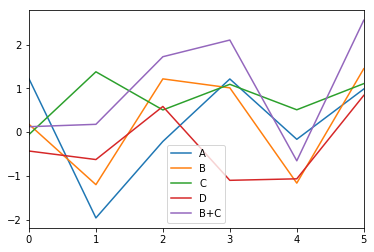

In [79]:
%matplotlib inline
df.plot()

### Prikaz samo nekaterih stolpcev

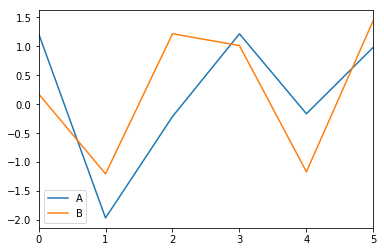

In [80]:
df[['A','B']].plot()

### Izbira osi

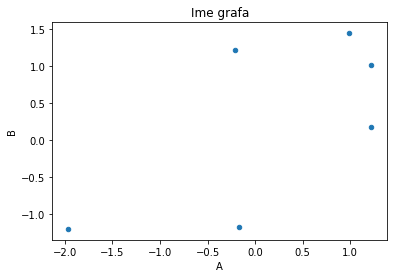

In [81]:
df.plot(kind='scatter', x='A', y='B', title='Ime grafa')

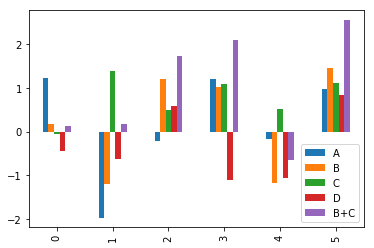

In [82]:
df.plot(kind='bar')

## Pandas - delo z bazo
### Izpiše celo tabelo, ne delati na drugih tabelah ker so prevelike

In [9]:
query("SELECT * FROM provider")

,uid,name,mcc_mnc,shortname,map_filter
0,38,Telekom Slovenije d.d.,293-41,Telekom Slovenije,True
1,41,Akademska in raziskovalna mreža Slovenije,None,Arnes,True
2,43,TELEING d.o.o.,None,TELEING,True
3,45,Telemach Rotovž d.d.,None,Telemach Rotovž,True
4,46,Telemach Tabor d.d.,None,Telemach Tabor,True
5,47,ARIO d.o.o.,None,ARIO,True
6,48,KaTe Nova Gorica,None,KaTe Nova Gorica,True
7,49,CATV SELNICA-RUŠE d.o.o.,None,CATV SELNICA-RUŠE,True
8,50,TELESAT d.o.o.,None,TELESAT,True
9,51,Telemach Pobrežje d.d.,None,Telemach Pobrežje,True


In [10]:
query("SELECT * FROM qos_test_objective")

,uid,test,test_class,test_server,concurrency_group,test_desc,test_summary,param,results
0,76,voip,1,6,10,voip.testinfo,test.desc.voip,"{'in_port': '5060', 'timeout': '6000000000', '...",[{'evaluate': '%EVAL if (nn.coalesce(voip_resu...
1,131,dns,0,6,640,dns.testinfo,test.desc.dns,"{'host': 'gmx.net', 'record': 'A', 'timeout': ...","[{'operator': 'ge', 'on_failure': 'dns.failure..."
2,75,traceroute,1,6,0,trace.testinfo,test.desc.trace,"{'host': 'akostest.net', 'timeout': '350000000...","[{'operator': 'eq', 'on_failure': 'traceroute...."
3,163,http_proxy,1,6,400,http.testinfo,test.desc.http,{'url': 'https://www.akostest.net/qostest/refe...,"[{'operator': 'eq', 'on_failure': 'http.failur..."
4,39,tcp,0,6,200,tcp.out.testinfo,test.desc.tcp.out,"{'timeout': '3000000000', 'out_port': '53'}","[{'operator': 'eq', 'on_failure': 'tcp.failure..."
5,40,tcp,0,6,100,tcp.out.testinfo,test.desc.tcp.out,"{'timeout': '3000000000', 'out_port': '110'}","[{'operator': 'eq', 'on_failure': 'tcp.failure..."
6,41,tcp,0,6,300,tcp.out.testinfo,test.desc.tcp.out,"{'timeout': '3000000000', 'out_port': '143'}","[{'operator': 'eq', 'on_failure': 'tcp.failure..."
7,16,website,0,6,500,website.testinfo,test.desc.website,"{'url': 'https://nettest.specure.com/kepler', ...","[{'operator': 'eq', 'on_failure': 'website.err..."
8,105,dns,1,6,600,dns.testinfo,test.desc.dns,"{'host': '24ur.com', 'record': 'A', 'timeout':...","[{'operator': 'ge', 'on_failure': 'dns.failure..."
9,110,dns,1,6,610,dns.unknowndomain.info,test.desc.dns,"{'host': 'touch.darkspace.akostest.net', 'reco...","[{'operator': 'eq', 'on_failure': 'dns.unknown..."


### Iskanje po času iz test tabele

In [11]:
query ("SELECT * FROM test WHERE time >= '2018-03-11' AND time < '2018-03-15'")

,uid,uuid,client_id,client_version,client_name,client_language,client_local_ip,token,server_id,port,...,client_ip_local_type,ping_median,ping_median_log,source_ip_anonymized,hidden_code,data,real_geo_lat,real_geo_long,real_location,publish_public_data
0,1117002,099465d7-37ce-4c97-80b2-732b2a0fd6c5,48407,0.3,RMBT,en,None,099465d7-37ce-4c97-80b2-732b2a0fd6c5_152072282...,8,443,...,site_local_ipv4,4451086.0,0.216155,86.61.26,None,None,NaN,NaN,None,True
1,1117003,13f1c548-ca33-4d68-a2b9-4b61f6b22019,48407,0.3,RMBT,en,None,13f1c548-ca33-4d68-a2b9-4b61f6b22019_152072283...,5,443,...,site_local_ipv4,10014773.0,0.333547,92.63.25,None,None,NaN,NaN,None,True
2,1117004,3a768863-decf-4b70-a2cd-bd383d1450dc,48407,0.3,RMBT,en,None,3a768863-decf-4b70-a2cd-bd383d1450dc_152072292...,8,443,...,site_local_ipv4,875277.0,-0.019285,31.15.169,None,None,NaN,NaN,None,True
3,1117005,dc38386c-3fdd-44b3-a928-983f36309a44,48407,0.3,RMBT,en,None,dc38386c-3fdd-44b3-a928-983f36309a44_152072293...,8,443,...,None,NaN,NaN,None,None,None,NaN,NaN,None,True
4,1117006,24b6ee19-16c7-46e1-bdb9-23ee0de8ebf2,48407,0.3,RMBT,en,None,24b6ee19-16c7-46e1-bdb9-23ee0de8ebf2_152072296...,8,443,...,site_local_ipv4,23159152.0,0.454908,90.157.216,None,None,NaN,NaN,None,True
5,1117007,d473f003-a3b9-413e-8c1d-0298f9e5e5da,48407,0.3,RMBT,en,None,d473f003-a3b9-413e-8c1d-0298f9e5e5da_152072304...,8,443,...,site_local_ipv4,1079769.0,0.011110,185.28.9,None,None,NaN,NaN,None,True
6,1117008,6639e5bf-4cf7-46a8-bff5-f9a16270c8f5,48407,0.3,RMBT,en,None,6639e5bf-4cf7-46a8-bff5-f9a16270c8f5_152072307...,8,443,...,public_ipv6,34958111.0,0.514516,2a00:ee2:1102::,None,None,NaN,NaN,None,True
7,1117009,f92da8de-a88a-4e1d-a999-7b4b475bf151,48407,0.3,RMBT,en,None,f92da8de-a88a-4e1d-a999-7b4b475bf151_152072325...,5,443,...,site_local_ipv4,5738344.0,0.252929,89.212.175,None,None,NaN,NaN,None,True
8,1117010,cf47917a-820c-4de0-9911-13a7fbbc126b,48407,0.3,RMBT,en,None,cf47917a-820c-4de0-9911-13a7fbbc126b_152072327...,8,443,...,public_ipv6,7507861.0,0.291839,2a00:ee2:1102::,None,None,NaN,NaN,None,True
9,1117011,cbd563ef-2c88-4895-9cc3-9bdd83587ee3,48407,0.3,RMBT,en,None,cbd563ef-2c88-4895-9cc3-9bdd83587ee3_152072327...,5,443,...,site_local_ipv4,1352719.0,0.043736,89.212.182,None,None,NaN,NaN,None,True


### Iskanje od danes pa do nekaj dni nazaj

In [29]:
from datetime import datetime, timedelta
query("SELECT * FROM test WHERE time >= '{do}' AND time <= '{zdaj}'".format(zdaj=datetime.now(),  do=datetime.now() - timedelta(days=30) ))

,uid,uuid,client_id,client_version,client_name,client_language,client_local_ip,token,server_id,port,...,client_ip_local_type,ping_median,ping_median_log,source_ip_anonymized,hidden_code,data,real_geo_lat,real_geo_long,real_location,publish_public_data
0,1069685,fafc12fd-52dd-4120-a233-719b1cc475ef,82332,0.1,RMBTws,de,None,fafc12fd-52dd-4120-a233-719b1cc475ef_151887861...,7,443,...,None,38318387.0,0.527802,193.95.241,None,None,NaN,NaN,None,True
1,1069686,be8cb7ad-5eec-445e-9845-9dc806a29ff9,48407,0.3,RMBT,en,None,be8cb7ad-5eec-445e-9845-9dc806a29ff9_151887862...,5,443,...,None,NaN,NaN,None,None,None,NaN,NaN,None,True
2,1069687,761b00e7-4b32-4ae8-86c0-167edcda04c9,48407,0.3,RMBT,en,None,761b00e7-4b32-4ae8-86c0-167edcda04c9_151887863...,5,443,...,None,NaN,NaN,None,None,None,NaN,NaN,None,True
3,1069688,cb54592e-aa46-47d2-bbcd-6bc74aecae48,48407,0.3,RMBT,en,None,cb54592e-aa46-47d2-bbcd-6bc74aecae48_151887868...,5,443,...,site_local_ipv4,842855.0,-0.024749,212.85.186,None,None,NaN,NaN,None,True
4,1069689,edf2aa57-fc9c-4375-8cc0-2854b91708ad,48407,0.3,RMBT,en,None,edf2aa57-fc9c-4375-8cc0-2854b91708ad_151887869...,8,443,...,None,NaN,NaN,None,None,None,NaN,NaN,None,True
5,1069690,2b16ee94-e1f1-420d-a63c-6ad423020918,85250,0.3,RMBT,sl,None,2b16ee94-e1f1-420d-a63c-6ad423020918_151887872...,5,443,...,None,NaN,NaN,None,None,None,NaN,NaN,None,True
6,1069691,4e681ab1-50cd-4c0c-98d8-23c79183924a,48407,0.3,RMBT,en,None,4e681ab1-50cd-4c0c-98d8-23c79183924a_151887874...,5,443,...,None,NaN,NaN,None,None,None,NaN,NaN,None,True
7,1069692,4e139123-4acf-4b46-bae1-66ce4067f262,48407,0.3,RMBT,en,None,4e139123-4acf-4b46-bae1-66ce4067f262_151887879...,5,443,...,None,NaN,NaN,None,None,None,NaN,NaN,None,True
8,1069693,80ef5f79-d440-4016-8bae-10a8a832825f,84602,0.1,RMBTws,,None,80ef5f79-d440-4016-8bae-10a8a832825f_151887884...,7,443,...,None,NaN,NaN,None,None,None,NaN,NaN,None,True
9,1069694,0f6e10a8-8c43-4ea9-be41-31a3c28f0144,48407,0.3,RMBT,en,None,0f6e10a8-8c43-4ea9-be41-31a3c28f0144_151887885...,5,443,...,None,NaN,NaN,None,None,None,NaN,NaN,None,True


### Izpiše test 76 za zadnja 3 meseca

In [40]:
query ("SELECT * FROM test,qos_test_result WHERE time >= '2018-03-01'AND time < '2018-03-15' \
        AND test.uid=qos_test_result.test_uid AND qos_test_uid=76")

,speed_download,speed_upload,server_id,plattform
0,137736.0,3912.0,5,Android
1,11872.0,924.0,8,Android
2,11853.0,983.0,5,Android
3,NaN,NaN,8,None
4,11877.0,1027.0,8,Android
5,195652.0,38077.0,8,Android
6,6580.0,435.0,8,Android
7,6599.0,488.0,8,Android
8,6595.0,376.0,5,Android
9,NaN,NaN,8,None


### Rezultati testa hitrosti za mobilne naprave v zadnje tri mesece

In [50]:
df = query ("SELECT speed_download, speed_upload, ping_shortest, server_id, geo_lat, geo_long, network_type, network_operator, network_operator_name, plattform, api_level, device, model, signal_strength FROM test, provider WHERE mobile_provider_id=provider.uid AND time >= '2018-01-01' AND time <= '2018-03-26' ")

## Shranjevanje v excel

In [88]:
import xlsxwriter
writer = pd.ExcelWriter('df_shranjen.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

## Shranjevanje za Orange ali branje za branje iz drugega notebooka

In [53]:
%store df

Stored 'df' (DataFrame)


### Brisanje z lokalnega diska

In [23]:
%store -z